# Simulating ARIMAX Time Series With Exogenous Variables and Seasonality

## 1) Import Modules

In [1]:
### Import Modules
import pandas as pd
from src.utils.paths import *
from src.paper import SarimaxSimulation

Loading helper functions...
Loading paths...


## 2) Simulation Settings

In [2]:
### Set number of periods (here: 20 years)
start = "2004-01"
end = "2023-12"

# Alternative (has to be specified as arg in function call !)
# years = 10
# nsimulations = years * 12 

### Set Seed
seed = 8

## 3) Simulation: Endogenous

To study the predictability of different timeseries using ensembles, we simulate 4 endogenous variables with increasing patterns.

In [3]:
# The error term (shock) variance is held constant
shock_sigma2 = 1

# We also bound the series at the same values
bounded = True
lower_bound = 40
upper_bound = 90

### 3.1) Random Walk

#### 3.1.1) Parameters

In [4]:
# Exogenous Variables
exog = None
exog_coefs = None

# Trend
trend = False
trend_value = None

# ARIMA (p,d,q)
order = (0, 1, 0)
ar_coefs = None
ma_coefs = None

# Seasonal Component (P,D,Q,m)
seasonal_order = (0, 0, 0, 0)
sar_coefs = None
sma_coefs = None

#### 3.2) Model Setup and Simulation

In [5]:
RW_model = SarimaxSimulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

In [6]:
RW_ts = RW_model.simulate(seed)

### 3.2) + Trend and Seasonality

#### 3.2.1) Parameters

In [7]:
# Exogenous Variables
exog = None
exog_coefs = None

# Trend
trend = True
trend_value = 0.01

# ARIMA (p,d,q)
order = (0, 1, 0)
ar_coefs = None
ma_coefs = None

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 0, 12)
sar_coefs = [0.4, 0.3]
sma_coefs = None

#### 3.2.2) Model Setup and Simulation

In [8]:
TrendSeasRW_model = SarimaxSimulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

In [9]:
TrendSeasRW_ts = TrendSeasRW_model.simulate(seed)

### 3.3) + Decent ARIMA components

#### 3.3.1) Parameters

In [10]:
# Exogenous Variables
exog = None
exog_coefs = None

# Trend
trend = True
trend_value = 0.01

# ARIMA (p,d,q)
order = (1, 1, 1)
ar_coefs = [0.1]
ma_coefs = [0.2]

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 0, 12)
sar_coefs = [0.4, 0.3]
sma_coefs = None

#### 3.3.2) Model Setup and Simulation

In [11]:
WeakSarima_model = SarimaxSimulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

In [12]:
WeakSarima_ts = WeakSarima_model.simulate(seed)

### 3.4) + Strong SARIMA Components

#### 3.4.1) Parameters

In [13]:
# Exogenous Variables
exog = None
exog_coefs = None

# Trend
trend = True
trend_value = 0.01

# ARIMA (p,d,q)
order = (3, 1, 4)
ar_coefs = [0.6, -0.2, 0.1]
ma_coefs = [0.4, -0.2, -0.1, 0.1]

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 1, 12)
sar_coefs = [0.4, 0.3]
sma_coefs = [-0.2]

#### 3.4.2) Model Setup and Simulation

In [14]:
StrongSarima_model = SarimaxSimulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

In [15]:
StrongSarima_ts = StrongSarima_model.simulate(seed)

### 3.5) + Covariate Influence

#### 3.5.1) Generation of Covariates

##### 3.5.1.1) Covariate 1

In [16]:
# Make sure you define all coefficients you need, when changing the model order!
# Leave empty when not defined

# Trend
trend = True
trend_value = 0.01

# ARIMA
order = (1, 1, 3) # p, d, q
ar_coefs = [-0.2]
ma_coefs = [0.1, 0.025, 0.01]

# Seasonal Component
seasonal_order = (2, 0, 0, 12) # P, D, Q, m
sar_coefs = [0.05, 0.01]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 100

# Bound Series?
bounded = True
lower_bound = 200
upper_bound = 500  

# Setup SARIMAX Model
exo1_model = SarimaxSimulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        exog=None, exog_coefs=None,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

# Simulate
exo1_ts = exo1_model.simulate(seed+1)

##### 3.5.1.1) Covariate 2

In [17]:
# Trend
trend = False
trend_value = 0.1

# ARIMA (p,d,q)
order = (4, 1, 4)
ar_coefs = [0.05, 0.05, -0.1, 0.1]
ma_coefs = [0.1, 0.01, -0.2, -0.1]

# Seasonal Component (P,D,Q,m)
seasonal_order = (1, 0, 0, 12)
sar_coefs = [0.1]
sma_coefs = None

# Error Term (Shock) Variance
shock_sigma2 = 0.01

# Bound Series?
bounded = True
lower_bound = 40
upper_bound = 80   

# Setup SARIMA Model
exo2_model = SarimaxSimulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        exog=None, exog_coefs=None,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

# Simulate
exo2_ts = exo2_model.simulate(seed+22)

##### 3.5.1.1) Covariate 3

In [18]:
# Trend
trend = True
trend_value = -0.05

# ARIMA (p,d,q)
order = (3, 1, 1)
ar_coefs = [0.15, -0.01, -0.01]
ma_coefs = [0.1]

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 1, 12)
sar_coefs = [0.3, 0.2]
sma_coefs = [-0.2]

# Error Term (Shock) Variance
shock_sigma2 = 4

# Bound Series?
bounded = True
lower_bound = 900
upper_bound = 950   

# Setup SARIMA Model
exo3_model = SarimaxSimulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        exog=None, exog_coefs=None,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

# Simulate
exo3_ts = exo3_model.simulate(seed+333)

#### 3.5.2) Endogenous: Parameters

In [19]:
# Error Term (Shock) Variance
shock_sigma2 = 5

# Bound Series
bounded = True
lower_bound = 40
upper_bound = 90

# Exogenous Variables
exog = [exo1_ts, exo2_ts, exo3_ts]
exog_coefs = [0.4, 0.2, -0.3]

# Trend
trend = True
trend_value = 0.01

# ARIMA (p,d,q)
order = (3, 1, 4)
ar_coefs = [0.6, -0.2, 0.1]
ma_coefs = [0.4, -0.2, -0.1, 0.1]

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 1, 12)
sar_coefs = [0.4, 0.3]
sma_coefs = [-0.2]

#### 3.5.3) Model Setup and Simulation

In [20]:
sarimax_model = SarimaxSimulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

In [21]:
sarimax_ts = sarimax_model.simulate(seed)

## 4) Plot Data

In [22]:
series_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"]
export_names = [os.path.join(PLOT_DIR, "sim_" + name, ".png") for name in series_names]
title_names = ["Random Walk (RW)", "RW\nwith Trend and Seasonality", "Weak Seasonal ARIMA",
               "Strong Seasonal ARIMA", "Strong Seasonal ARIMA\nwith Covariate Influence"]

### 4.1) Endogenous

Plotting RW
Plotting TrendSeasRW
Plotting WeakSARIMA
Plotting StrongSARIMA
Plotting SARIMAX


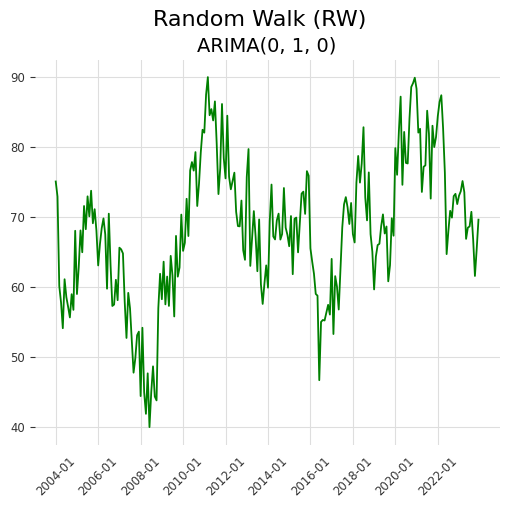

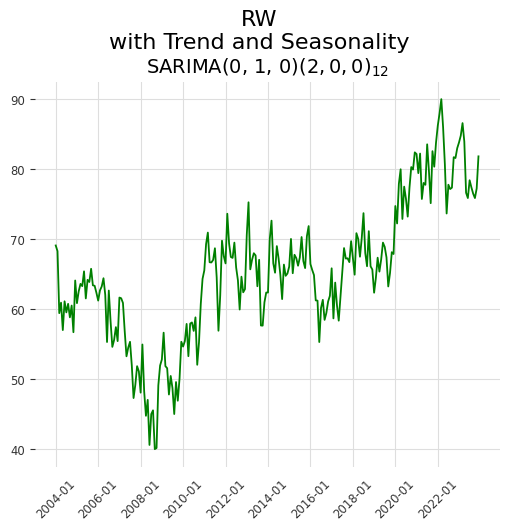

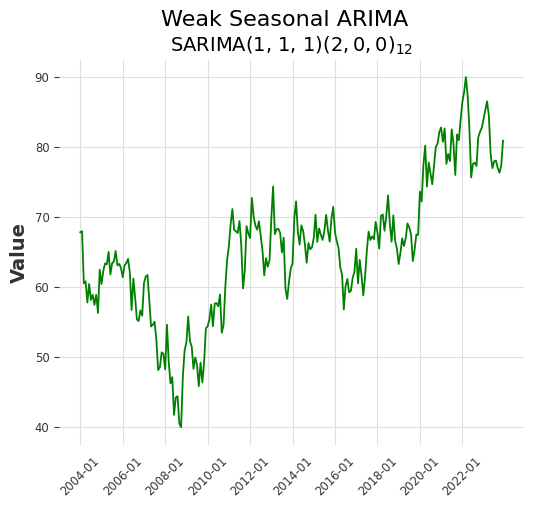

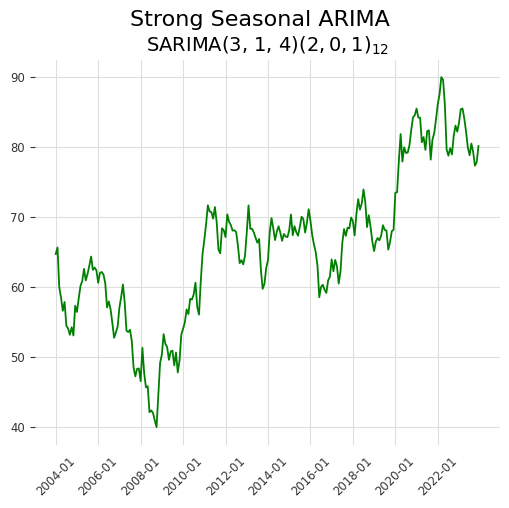

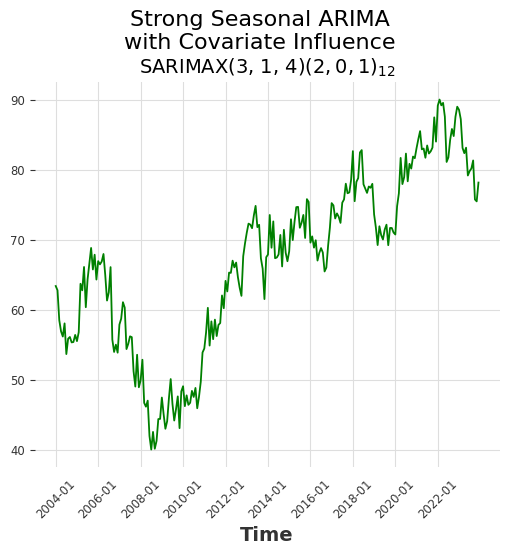

In [23]:
series_list = [RW_ts, TrendSeasRW_ts, WeakSarima_ts, StrongSarima_ts, sarimax_ts]
for i, series in enumerate(series_list):
        print(f"Plotting {series_names[i]}")
        series.plot(title_names[i], export_name=series_names[i], export_path=PLOTSIM_DIR, color="green")

### 4.2) Exogenous

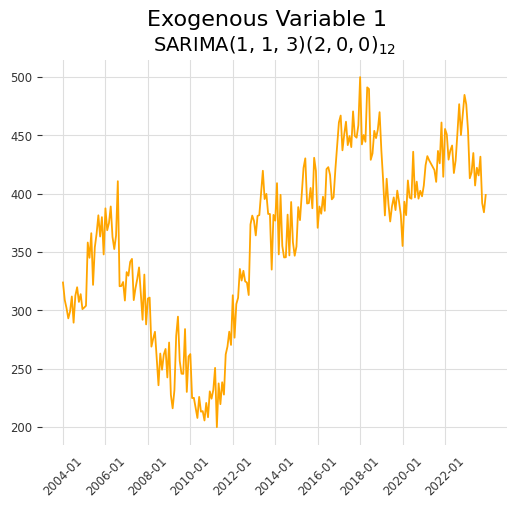

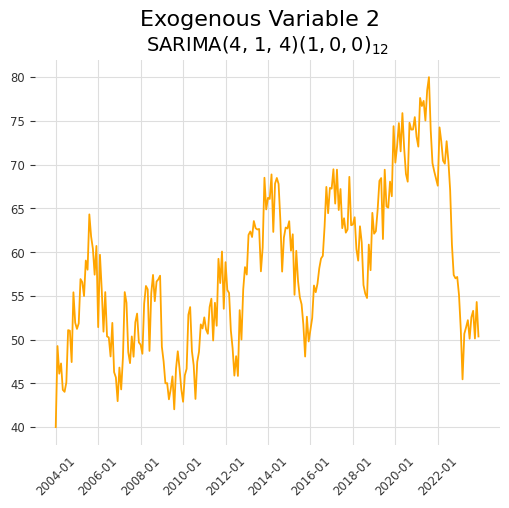

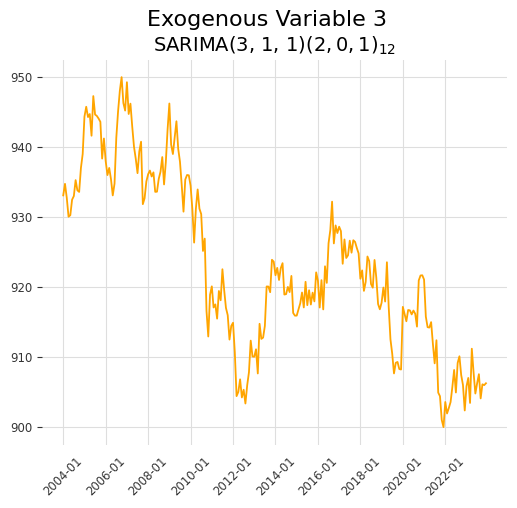

In [24]:
exo_plot_filenames = ['exo1', 'exo2', 'exo3']
exo_series_list = [exo1_ts, exo2_ts, exo3_ts]
for i, ts in enumerate(exo_series_list): 
    ts.plot(f"Exogenous Variable {i+1}", export_name=exo_plot_filenames[i], export_path=PLOTSIM_DIR, color = "orange")

### 4.3) All Plots in One

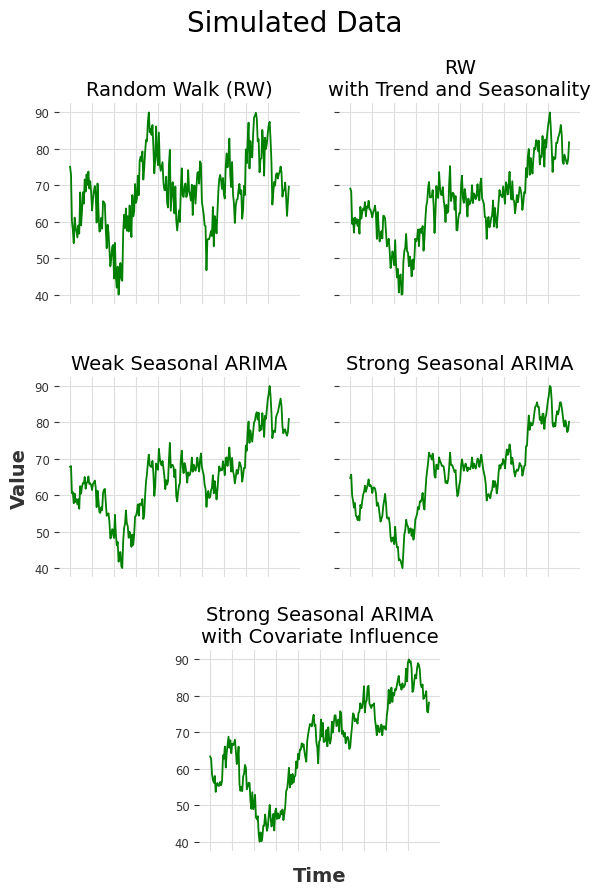

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (6, 9)) # sharex=True, sharey=True, 
gs = fig.add_gridspec(3, 4)
# fig, axs = plt.subplots(3,2, sharex=True, sharey=True, figsize = (6, 9))#, constrained_layout=True)
#plt.subplots_adjust(hspace=0.15, wspace=0.15)
ax = None
for i, series in enumerate(series_list):
    # row = i // 2  # Integer division to get the row index
    # col = i % 2   # Modulo operation to get the column index
    if i == 0:
        rowpos, colpos = 0, slice(0, 2)
    elif i == 1:
        rowpos, colpos = 0, slice(2, 4)
    elif i == 2:
        rowpos, colpos = 1, slice(0, 2)
    elif i == 3:
        rowpos, colpos = 1, slice(2, 4)
    elif i == 4:
        rowpos, colpos = 2, slice(1, 3)
    else:
        rowpos, colpos = None, None
        
    y_share_info = ax if i % 2 != 0 else None
    x_share_info = False if i == 4 else True

    ax = fig.add_subplot(gs[rowpos, colpos], sharey=y_share_info)#, sharex=x_share_info)
    # ax.get_xaxis().set_visible(x_share_info)
    series.plot(title=title_names[i], color="green", custom_ax=ax)
    #if x_share_info:
    ax.set_xticklabels([])
        
fig.suptitle("Simulated Data", fontsize=20, y=0.99)
plt.tight_layout(h_pad=2)
#plt.subplots_adjust(top=0.9)


plt.savefig(os.path.join(PLOTSIM_DIR, "combined_series.png"))
plt.show()


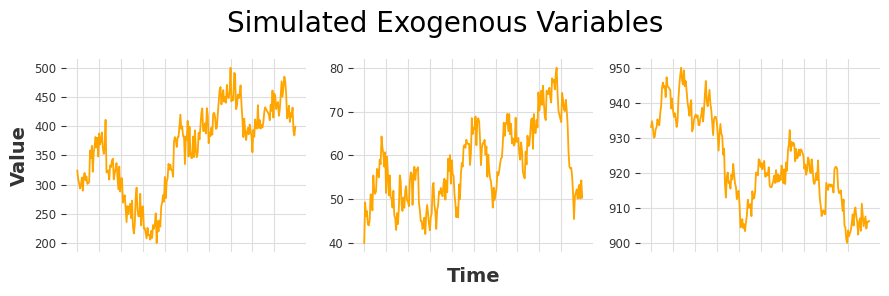

In [26]:
fig, axs = plt.subplots(1,3, sharex=True, figsize = (9, 3))
exo_series_names = ['Exogenous 1', 'Exogenous 2', 'Exogenous 3']
for i, series in enumerate(exo_series_list):
    ax = axs[i] 
    series.plot(color="orange", title=exo_series_names[i], custom_ax=ax)
    ax.set_xticklabels([])
    
fig.suptitle("Simulated Exogenous Variables", fontsize=20, y=0.97)
plt.tight_layout(h_pad=2)
plt.savefig(os.path.join(PLOTSIM_DIR, "combined_exogenous_series.png"), dpi=300)
plt.show()

## 5) Export Data as CSV

In [27]:
for i, series in enumerate(series_list):
    var_names = series_names[i]
    if i < 4:
        # Rename series
        series.name = var_names
    else:
        # Extra treatment for SARIMAX
        # Concatenate the series to a dataframe
        series = pd.concat([series, exo1_ts, exo2_ts, exo3_ts], axis=1)
        var_names = [var_names] + ["x1", "x2", "x3"]
    # Rename Columns
    series.columns = var_names
    # Rename Index to 'Date'
    series.index.name = "Date"
    # Optionally, you can format the 'Date' column as 'YYYY-MM-DD'
    series = series.to_timestamp()
    # Export
    series.to_csv(os.path.join(SIMDATA_DIR, series_names[i] + ".csv"))